# NDVI timeseries 

In [1]:
## Import libraries and useful functions

suppressMessages({
  library(ggplot2)
  library(terra)
  library(leaflet)
  library(tidyr)
  library(dplyr)
})

library(ggplot2)
library(terra)
library(leaflet)
library(tidyr)
library(dplyr)

source("../scripts/utils.R")
source("../scripts/visualize.R")

### Main parameters defined by user (country, spatial resolution, time range to inspect)

In [2]:
country_name <- "Zambia"
resolution <- 100 # in meters
# last month and year of data to include in plot
end_year <- 2024
end_month <- 12

### Set paths and define additional parameters

In [3]:
data_type <- "NDVI"
# Input NVDI basemaps stored in country folder. 
data_path <- paste0("../data/", data_type, "/", country_name, "/", resolution, "m_resolution/")
# Area of Interest (AoI) files in AoI folder
aoi_path <- "../data/AoI/"

## define end and start date for test data
end_date <- as.Date(paste(end_year, end_month, 1, sep="-"))
start_date <- seq(end_date, length = 2, by = "-11 months")[2]

### Get list of relevant filenames

In [4]:
## Create lists with relevant filenames.
# NDVI filenames
ndvi_files <- get_filenames(filepath = data_path, data_type = data_type, 
                            file_extension = ".tif", country_name = country_name)

# AoI filenames
aoi_files <- get_filenames(filepath = aoi_path, data_type = "AoI", 
                           file_extension = ".geojson", country_name = country_name)


Loading NDVI data for Zambia 

Loading AoI data for Zambia 


### Subselect filenames according to date

In [5]:
# get NDVI filenames dataframe (includes date info)
files_df <- get_filename_df(ndvi_files = ndvi_files)

# Given date selected, split file into test data and train data
# test filenames
test_files_df <- filter(files_df, between(dates, start_date, end_date))
# get train filenames
# (train interval: prior to test interval start)
train_files_df <- files_df[(files_df$dates< start_date),]

### Load raster and vector objects - Aoi, train data and test data

In [6]:
# load input Area of Interest (AoI) to later mask data
aoi_proj <- get_aoi_vector(aoi_files = aoi_files, aoi_path = aoi_path,
                           projection = "EPSG:4326")

test_ndvi_msk <- get_ndvi_raster(ndvi_files = test_files_df$filenames, data_path = data_path,
                            projection = "EPSG:4326", dates = test_files_df$dates,
                            aoi_proj = aoi_proj)

train_ndvi_msk <- get_ndvi_raster(ndvi_files = train_files_df$filenames, data_path = data_path,
                            projection = "EPSG:4326", dates = train_files_df$dates,
                            aoi_proj = aoi_proj)


Reading layer `AoI_Mponda' from data source 
  `/home/user/data/AoI/AoI_Zambia_By_Life_Connected.geojson' 
  using driver `GeoJSON'
Simple feature collection with 1 feature and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 26.77027 ymin: -15.1321 xmax: 26.92342 ymax: -14.85555
Geodetic CRS:  WGS 84


### Calculate mean NDVI for each month

In [7]:
# Extract raster layers for each date
# and store in dataframe
test_ndvi_df <- get_ndvi_df(ndvi_rast = test_ndvi_msk, dates = test_files_df$dates) 
train_ndvi_df <- get_ndvi_df(ndvi_rast = train_ndvi_msk, dates = train_files_df$dates) 

In [8]:
## Compute mean, SD, and confidence intervals
# test data
test_ndvi_summary <- get_summary_ndvi_df(ndvi_df = test_ndvi_df)
# train data
train_ndvi_summary <- get_summary_ndvi_df(ndvi_df = train_ndvi_df)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


### Inspect distribution of NDVI values throughout the year.

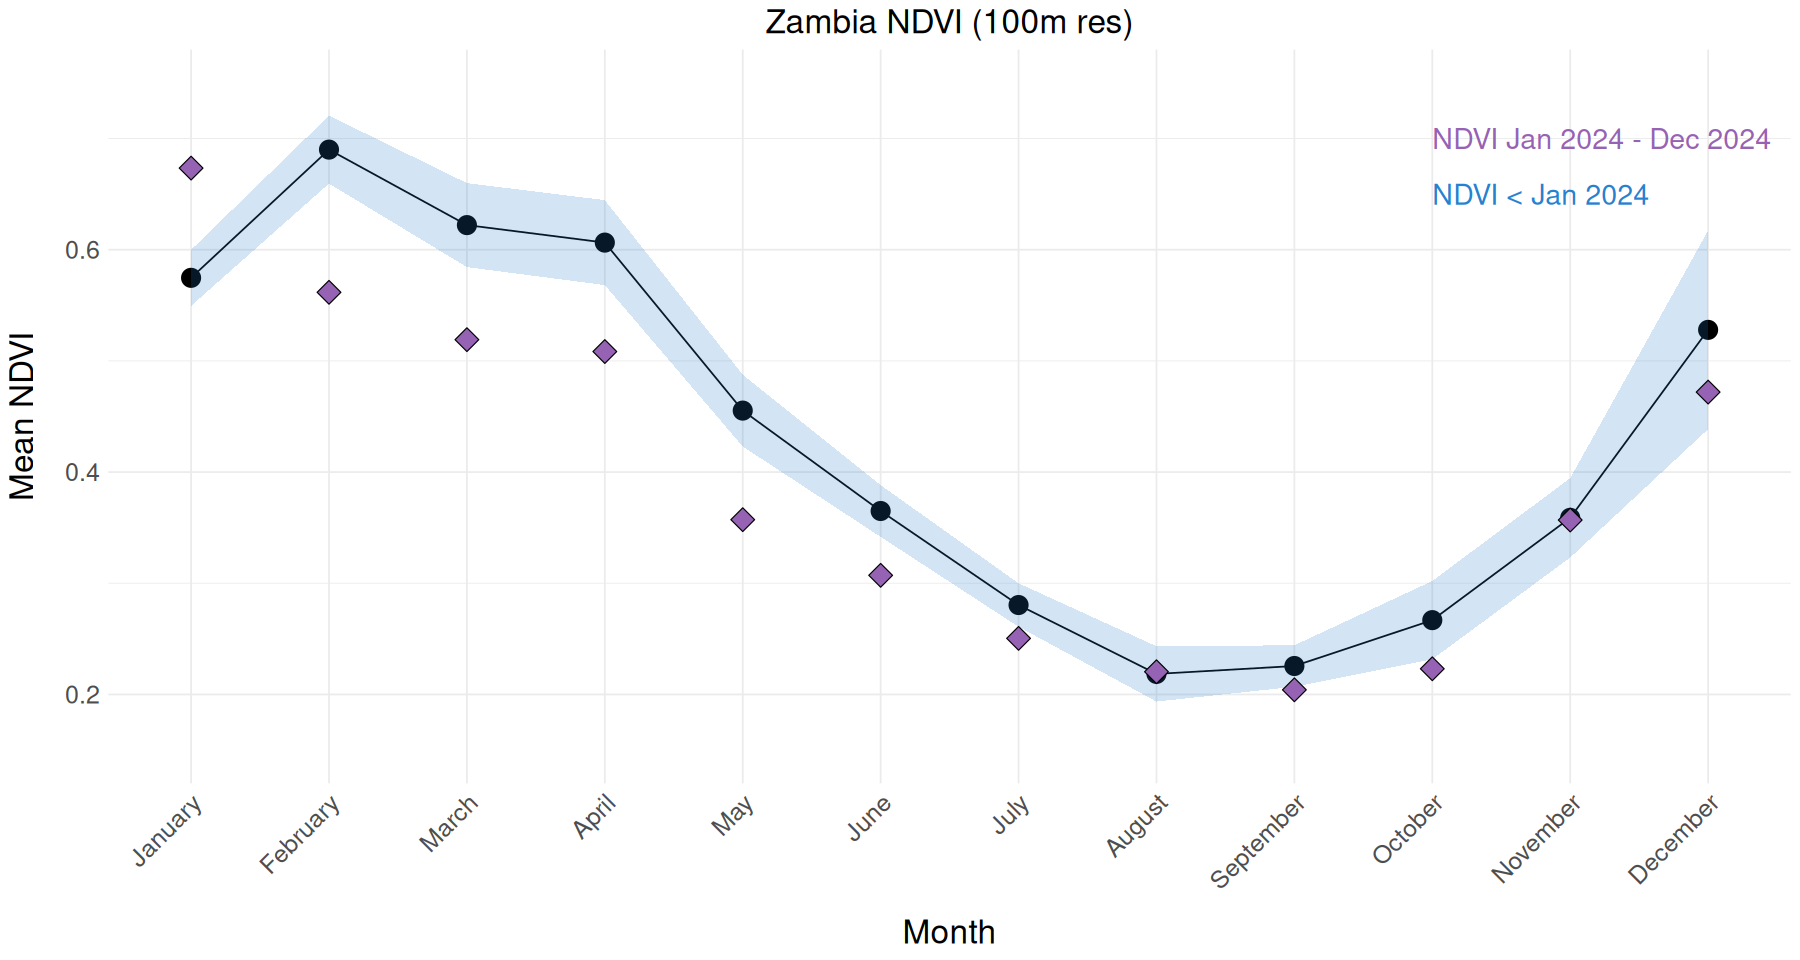

In [9]:
## Make plot
ndvi_ts_plot <- plot_ndvi_timeseries(train_data = train_ndvi_summary, 
                                        test_data = test_ndvi_summary,
                                        country_name = country_name, 
                                        resolution = resolution,
                                        plot_width = 15, 
                                        plot_height = 8,
                                        ylim_range = c(0.15, 0.75),
                                        test_start_date = start_date,
                                        test_end_date = end_date,
                                        label_test = paste0("NDVI ", paste(format(c(start_date, end_date), "%b %Y"),collapse=" - ") ),
                                        label_train = paste0("NDVI < ", format(start_date, "%b %Y") ),
                                        save_path = NULL, 
                                        filename = paste0(country_name, "_", 
                                                          resolution, "m_",
                                                          "NDVI_timeseries.png")
                                        )
ndvi_ts_plot